#### For use on Linux system only (Conda Root), and uses Python 2.7.12

In [169]:
import sys
import os
from ete3 import Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# need to save .tree file in the same folder to reduce os walking
print os.getcwd()

/home/jacob/Dropbox/FYP


## Input - Run through until end of second pass, no undoing

In [209]:
intree = 'h3n2_rooted_binary_150916.tree'
outtree = 'h3n2_nolongbranch_210916.tree'
outlierseq = '163974_2010' #identify from ATV viewing

t = Tree(intree)

### First pass - Delete outlier clade

In [210]:
#t = Tree('h3n2_rooted_binary_150916.tree')

In [211]:
# outlier clade identified from ATV
outlier = t.search_nodes(name=outlierseq)[0]

# indexing ancestral lineages
a = outlier.up
aa = a.up
aaa = aa.up

# storing list of deleted leaves for records
deleted = set()
for node in a.traverse("preorder"):
    if node.is_leaf() == True:
        deleted.add(node.name)
deletedlist = list(deleted)

print "% leaves were deleted" % len(deleted)

# writing deleted leaves to file
outfile = open('deletednodes210916.txt', 'w')
for seq in deletedlist:
    outfile.write(seq + '\n')
outfile.close()

 2.120000e+02aves were deleted


In [212]:
len(deleted)

212

In [213]:
# removing outlier clade and resolving resultant singleton node
a.detach()
aachild = aa.children[0]
totalnewdist = aachild.dist + aa.dist
aaa.add_child(aachild)
aachild.dist = totalnewdist
aa.detach()

Tree node '' (0x7fb763ae609)

### Second pass - Remove leaves > 0.01 

In [214]:
# read tree into memory

# Removes leaves with distances more than cutoff (0.01), resolves singletons

count=0

for node in t.traverse("preorder"):
    if node.dist>0.01 and node.is_leaf():
        p = node.up
        pp = p.up
        node.detach()
        pchild = p.children[0]
        pchild.dist += p.dist
        pp.add_child(pchild)
        p.detach()
        if len(pp.children) != 2: # has to be a binary tree
            print 'Error!'


print "% leaves were deleted" % count

t.write(format=5, outfile=outtree)

 0.000000e+00aves were deleted


# Histogram plotter code

In [20]:
t = Tree(intree) # can use outtree too

In [21]:
names = []
lengths = []

for node in t.traverse("preorder"):
    
    names.append(node.name)
    lengths.append(node.dist)

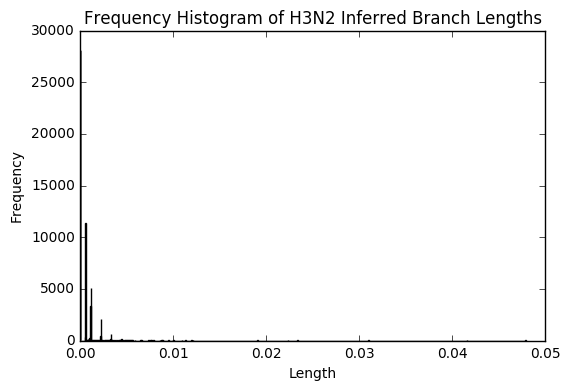

In [22]:
plt.hist(lengths, bins='auto')
plt.title("Frequency Histogram of H3N2 Inferred Branch Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [23]:
min(lengths), max(lengths)

(0.0, 0.04789)

In [24]:
count = 0
for x in lengths:
    if x >0.0056:
        count += 1
print count

65


In [25]:
len(names)

53356